In [ ]:
!gdown --id 1oXLMVnuYZ0tX-MzMG8N8lwMsC5-aM-nv --output anotacoes_especialistas.csv
!gdown --id 1wG0iOHehIWF38kEpGhuHfFRotBBMC9t_ --output CSV.zip
!unzip CSV.zip

Downloading...
From: https://drive.google.com/uc?id=1oXLMVnuYZ0tX-MzMG8N8lwMsC5-aM-nv
To: /content/anotacoes_especialistas.csv
2.61MB [00:00, 83.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1wG0iOHehIWF38kEpGhuHfFRotBBMC9t_
To: /content/CSV.zip
100% 1.32M/1.32M [00:00<00:00, 69.7MB/s]
Archive:  CSV.zip
   creating: CSV/
  inflating: CSV/original.csv        
  inflating: CSV/val.csv             
  inflating: CSV/test.csv            
  inflating: CSV/train.csv           
  inflating: CSV/train_additional_data.csv  


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
!pip install dtreeviz

     |████████████████████████████████| 61kB 3.6MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3-cp37-none-any.whl size=66640 sha256=3664e80a6c1462e98b30ad0da0fe6994e0ee02544784bd0ae1853d4449b2014d
  Stored in directory: /root/.cache/pip/wheels/60/36/b1/188ee35c677e48463f6482d580f81c19f5f82ae5adbe293fd8
Successfully built dtreeviz


In [ ]:
from dtreeviz.trees import dtreeviz

In [ ]:
import pandas as pd

train_index = pd.read_csv('/content/CSV/train.csv')
val_index = pd.read_csv('/content/CSV/val.csv')
dados = pd.read_csv('/content/anotacoes_especialistas.csv')
train = dados.iloc[list(train_index['original_index'].values), 10:]
val = dados.iloc[list(val_index['original_index'].values), 10:]
train = train[sorted(train.columns.tolist())]
val = val[sorted(val.columns.tolist())]

In [ ]:
X_train = []
for amostra in train.values:
  row = []
  for i in range(0, len(amostra), 3):
    arr = np.array([amostra[i], amostra[i+1], amostra[i+2]])
    row.append(int(np.nanmean(arr)))
  X_train.append(row)
X_train = np.array(X_train)

X_val = []
for amostra in val.values:
  row = []
  for i in range(0, len(amostra), 3):
    arr = np.array([amostra[i], amostra[i+1], amostra[i+2]])
    row.append(int(np.nanmean(arr)))
  X_val.append(row)
X_val = np.array(X_val)

In [ ]:
X_train.shape, X_val.shape

((1111, 10), (278, 10))

In [ ]:
y_train = dados.iloc[list(train_index['original_index'].values), 9].values
y_val = dados.iloc[list(val_index['original_index'].values), 9].values

In [ ]:
counter = Counter(y_train)  
max_val = float(max(counter.values()))  
class_weights = {class_id : max_val/num_images for class_id, num_images in counter.items()}    
class_weights 

{0.0: 1.3982300884955752, 1.0: 1.0, 2.0: 1.5906040268456376}

In [ ]:
params = {'max_depth': [3, 5, 10, 15, 20]}
tree = DecisionTreeClassifier(class_weight=class_weights)
clf = GridSearchCV(tree, param_grid=params, scoring='balanced_accuracy', cv=5)
clf.fit(X_train, y_train)
decision_tree = clf.best_estimator_
print(decision_tree)

pred = decision_tree.predict(X_val)

print(confusion_matrix(y_val, pred))

cm = confusion_matrix(y_val, pred)
cm = cm / cm.astype(np.float).sum(axis=1, keepdims=True)
balanced_acc = np.trace(cm) / 3
print('Acuracia balanceada na validacao:', balanced_acc)

DecisionTreeClassifier(ccp_alpha=0.0,
                       class_weight={0.0: 1.3982300884955752, 1.0: 1.0,
                                     2.0: 1.5906040268456376},
                       criterion='gini', max_depth=5, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')
[[21 35 32]
 [25 58 24]
 [19 38 26]]
Acuracia balanceada na validacao: 0.36464848348363715


In [ ]:
!gdown --id 1IacXd53SpDZug3sJ-l6yrPIIqr0JJ_x2 --output arvore.sav

Downloading...
From: https://drive.google.com/uc?id=1IacXd53SpDZug3sJ-l6yrPIIqr0JJ_x2
To: /content/arvore.sav
100% 6.12k/6.12k [00:00<00:00, 10.3MB/s]


In [ ]:
import pickle

decision_tree = pickle.load(open('/content/arvore.sav', 'rb'))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


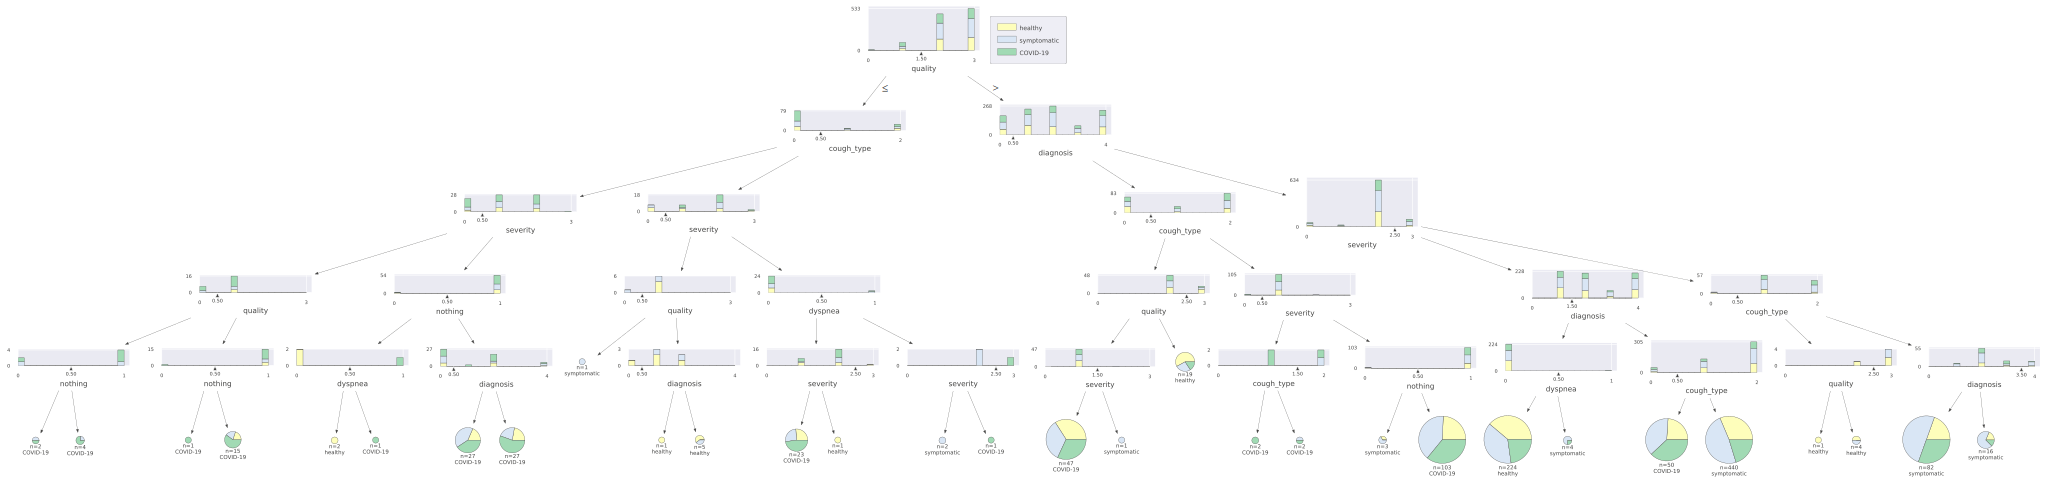

In [ ]:
viz = dtreeviz(decision_tree, X_train, y_train,
               feature_names=['choking', 'congestion', 'cough_type', 'diagnosis', 'dyspnea', 'nothing', 'quality', 'severity', 'stridor', 'wheezing'],
              class_names=['healthy','symptomatic','COVID-19'])

viz

In [ ]:
viz.save("decision_tree.svg")

In [ ]:
import pickle

pickle.dump(decision_tree, open('arvore_de_decisao.sav', 'wb'))

# Avaliação no teste

In [ ]:
test_index = pd.read_csv('/content/CSV/test.csv')
dados = pd.read_csv('/content/anotacoes_especialistas.csv')
test = dados.iloc[list(test_index['original_index'].values), 10:]
test = test[sorted(test.columns.tolist())]

In [ ]:
test

,choking_1,choking_2,choking_3,congestion_1,congestion_2,congestion_3,cough_type_1,cough_type_2,cough_type_3,diagnosis_1,diagnosis_2,diagnosis_3,dyspnea_1,dyspnea_2,dyspnea_3,nothing_1,nothing_2,nothing_3,quality_1,quality_2,quality_3,severity_1,severity_2,severity_3,stridor_1,stridor_2,stridor_3,wheezing_1,wheezing_2,wheezing_3
141,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,3.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
229,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN,0.0,NaN,NaN,0.0
283,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN,0.0,NaN,NaN,0.0
296,NaN,0.0,NaN,NaN,0.0,NaN,NaN,2.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN
382,NaN,0.0,NaN,NaN,0.0,NaN,NaN,2.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19709,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,2.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
19733,0.0,NaN,NaN,0.0,NaN,NaN,2.0,NaN,NaN,4.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
19776,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,4.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
19883,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN,0.0,NaN,NaN,0.0


In [ ]:
X_test = []
for amostra in test.values:
  row = []
  for i in range(0, len(amostra), 3):
    arr = np.array([amostra[i], amostra[i+1], amostra[i+2], 1e-10])
    row.append(int(np.nanmean(arr)))
  X_test.append(row)
X_test = np.array(X_test)

In [ ]:
X_test.shape

(347, 10)

In [ ]:
y_test = dados.iloc[list(test_index['original_index'].values), 9].values

In [ ]:
pred = decision_tree.predict(X_test)

print(confusion_matrix(y_test, pred))

cm = confusion_matrix(y_test, pred)
cm = cm / cm.astype(np.float).sum(axis=1, keepdims=True)
balanced_acc = np.trace(cm) / 3
print('Acuracia balanceada no teste:', balanced_acc)

[[41  1 56]
 [58  1 75]
 [47  4 64]]
Acuracia balanceada no teste: 0.3274505908787915


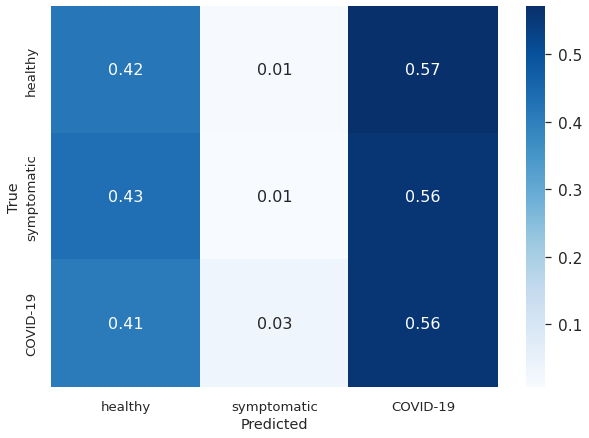

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

import seaborn as sns
import math

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib as mpl

mpl.style.use('seaborn')

plt.rcParams.update({'font.size': 16})
sns.set(font_scale=1.2)

index = [ 'healthy', 'symptomatic', 'COVID-19']

cm = cm / cm.sum(axis=1)

df_cm = pd.DataFrame(cm, columns=index, index=index)

df_cm.index.name = 'True'
df_cm.columns.name = 'Predicted'

fig, ax = plt.subplots(figsize=(10, 7))
ax.set_yticklabels(index, va='center', rotation = 90, position=(0,1))

sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='.2f')# font size

plt.savefig('matriz-confusão.png', dpi=400)

In [ ]:
pred = decision_tree.predict(X_val)

print(confusion_matrix(y_val, pred))

cm = confusion_matrix(y_val, pred)
cm = cm / cm.astype(np.float).sum(axis=1, keepdims=True)
balanced_acc = np.trace(cm) / 3
print('Acuracia balanceada na validação:', balanced_acc)

[[21 35 32]
 [25 58 24]
 [19 38 26]]
Acuracia balanceada na validação: 0.36464848348363715


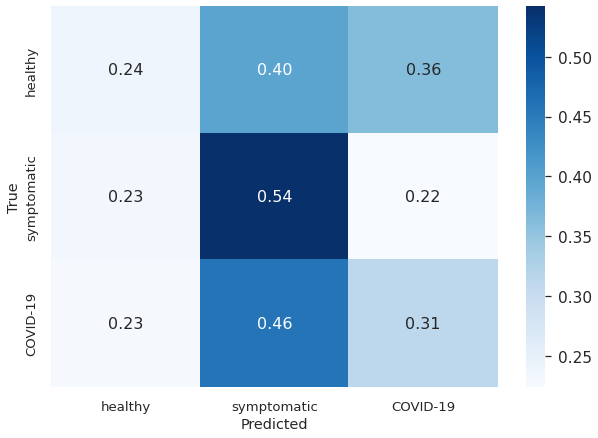

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

import seaborn as sns
import math

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib as mpl

mpl.style.use('seaborn')

plt.rcParams.update({'font.size': 16})
sns.set(font_scale=1.2)

index = [ 'healthy', 'symptomatic', 'COVID-19']

cm = cm / cm.sum(axis=1)

df_cm = pd.DataFrame(cm, columns=index, index=index)

df_cm.index.name = 'True'
df_cm.columns.name = 'Predicted'

fig, ax = plt.subplots(figsize=(10, 7))
ax.set_yticklabels(index, va='center', rotation = 90, position=(0,1))

sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='.2f')# font size

plt.savefig('matriz-confusão-val.png', dpi=400)

In [ ]:
np.save('arvore-test.npy', pred)

In [18]:
np.save('y-test.npy', y_test)